# Heart Failure Prediction

In [4]:
from IPython.display import display, Image

display(Image(url="https://images.stockcake.com/public/c/5/a/c5a70910-16d6-4148-9561-32ff659cda4a_large/glowing-heart-art-stockcake.jpg"))  # Replace with your image URL

## Motivation

Heart disease remains one of the leading causes of mortality worldwide, affecting millions of individuals and placing a significant burden on healthcare systems. As someone with firsthand experience seeing family members affected by heart disease, I am deeply motivated to explore predictive measures that can help identify and mitigate the risk of heart failure at an early stage.

Despite advancements in cardiovascular treatment, early detection of heart failure remains a critical challenge. Many cases progress silently, with symptoms only becoming evident once significant damage has occurred. By developing a predictive model, this project aims to bridge the gap between early risk assessment and clinical intervention, ultimately helping individuals receive the necessary care before heart failure reaches an advanced stage.

### Dataset

Dataset Citation: Heart Failure Clinical Records [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Import Data (via UCI repo)

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 
  
# metadata 
print(heart_failure_clinical_records.metadata) 
  
# variable information 
print(heart_failure_clinical_records.variables) 

{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

### Variable Description

In [4]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [5]:
# Target 
y = np.array(y, dtype=int) 
y = y.ravel()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## LDA/QDA

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)
pred = model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, pred)
print("LDA accuracy is", accuracy)
print(model.coef_)

LDA accuracy is 0.8111111111111111
[[ 5.86166992e-02 -4.38030667e-01  6.17240990e-06  7.43910396e-02
  -8.16417249e-02 -2.97783533e-01 -1.30780838e-06  1.06362550e+00
  -3.88244193e-02 -1.05698191e+00  4.35644735e-01 -2.40238358e-02]]


In [9]:
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(X_train, y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("QDA accuracy is", accuracy)

QDA accuracy is 0.7


Looks like more of a linear pattern.

## Log Reg

In [10]:
from sklearn import linear_model

logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Rgression Accuracy: {:.4f}%".format(accuracy * 100))

Logistic Rgression Accuracy: 80.0000%


LDA is still the best.

## Boosting

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(n_estimators=17, random_state=42)
boosting.fit(X_train, y_train)

y_pred_boost = boosting.predict(X_test)
boost_accuracy = accuracy_score(y_test, y_pred_boost)
print("Boosting Accuracy: {:.4f}%".format(boost_accuracy * 100))

Boosting Accuracy: 72.2222%


LDA is still the best.

## RF

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.6f}")

Accuracy on test set: 0.766667


LDA is still the best.

## Lets look into our model assumptions and deeper model evaluation for LDA as it seems to be our highest accuracy.

### Checking Normal distribution

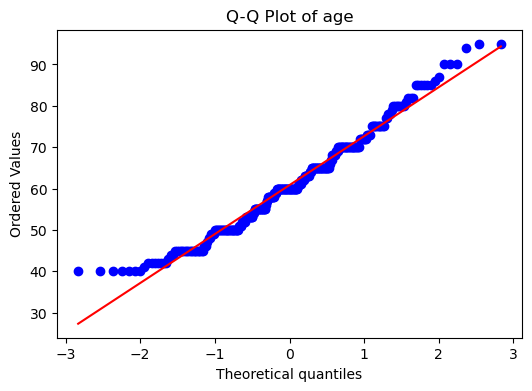

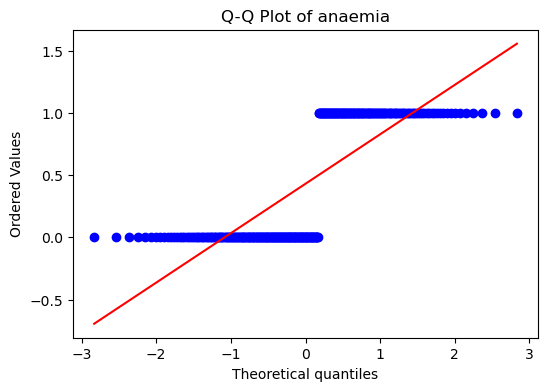

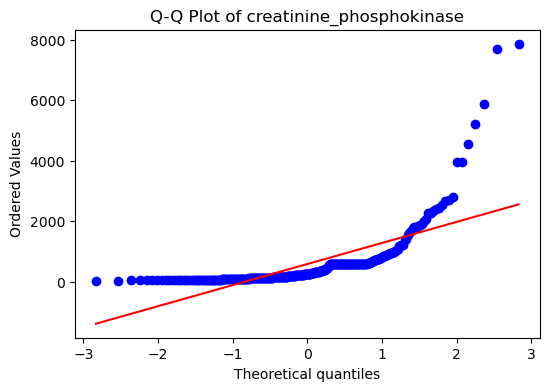

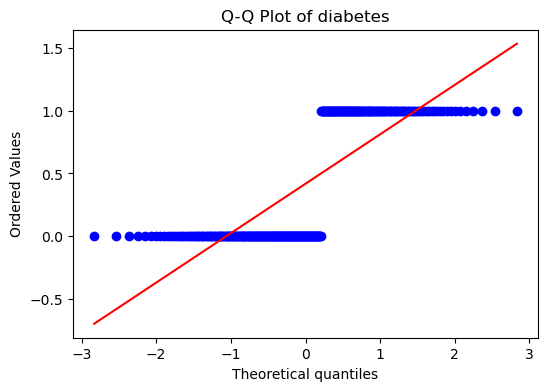

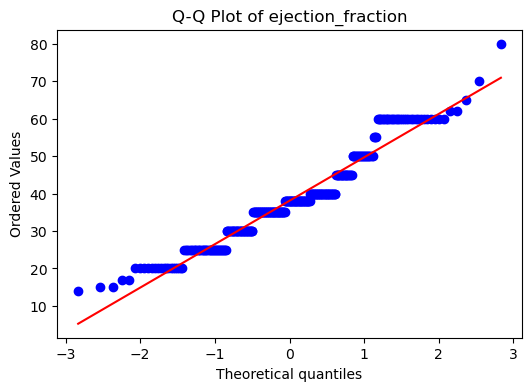

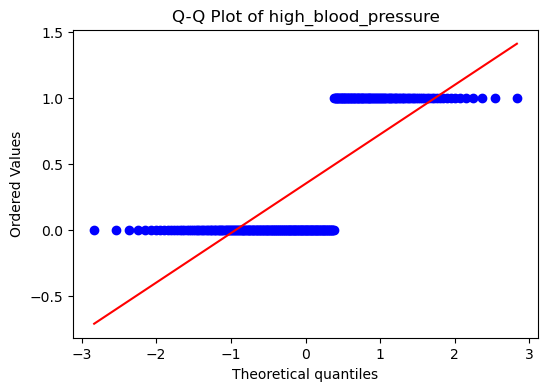

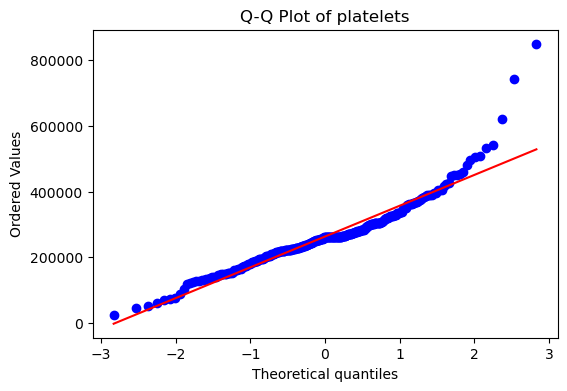

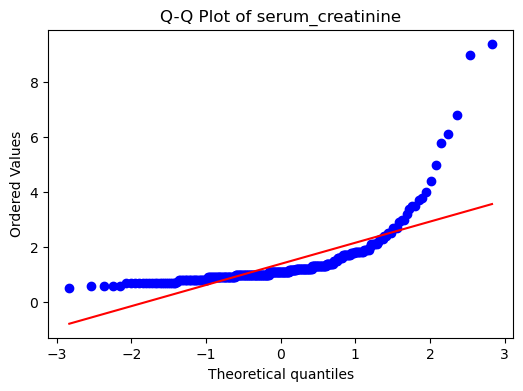

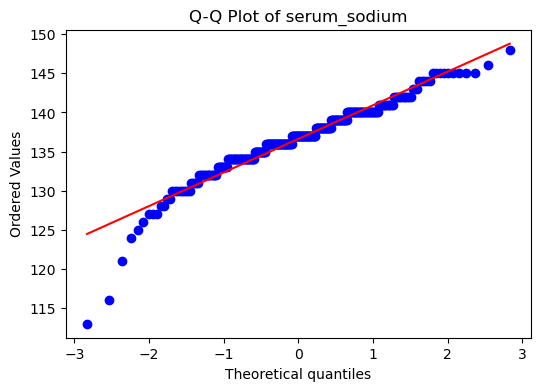

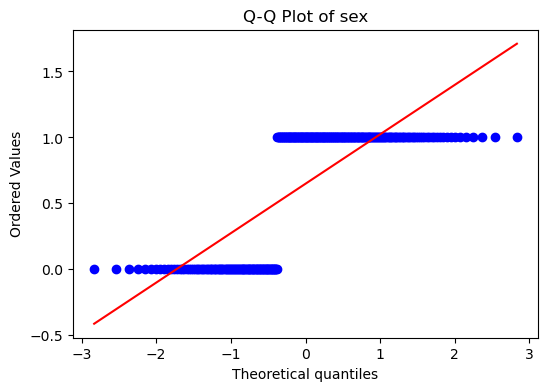

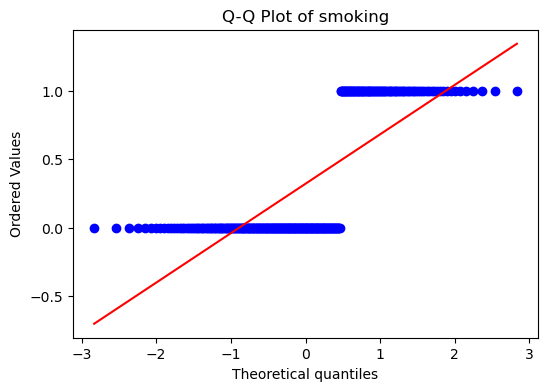

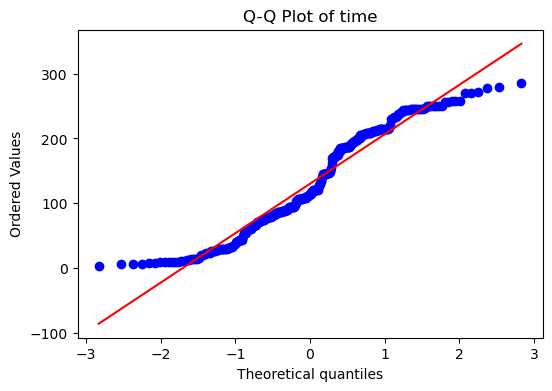

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for column in X.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(X[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()

We have some indescrepancies for normality in our features, specifically creatinine_phosphokinase and serum_creatine.

### Checking Equal Covariance Matrices

In [27]:
from scipy.stats import levene
from sklearn.preprocessing import StandardScaler

def validate_covariance(X, y, feature_name):
    """
    Calculates covariance matrices for each class of a feature and tests for equality.

    Args:
        X (pd.DataFrame): The feature DataFrame.
        y (np.array): The target NumPy array.
        feature_name (str): The name of the feature to analyze.
    """

    # Separate data by class
    class_data_1 = X[y == np.unique(y)[0]][feature_name]
    class_data_2 = X[y == np.unique(y)[1]][feature_name]

    # Calculate covariance matrices (variances)
    cov_matrix_1 = np.var(class_data_1)
    cov_matrix_2 = np.var(class_data_2)

    # Perform Levene's test for equality of variances
    levene_stat, levene_p = levene(class_data_1, class_data_2)

    # Print Results
    print(f"Feature: {feature_name}")
    print(f"Class {np.unique(y)[0]} Variance: {cov_matrix_1}")
    print(f"Class {np.unique(y)[1]} Variance: {cov_matrix_2}")
    print(f"Levene's Test p-value: {levene_p}")

    # Interpret Levene's Test
    alpha = 0.05  # Significance level
    if levene_p > alpha:
        print("Variances are approximately equal (p >", alpha, "). LDA assumption is likely met.")
    else:
        print("Variances are significantly different (p <=", alpha, "). LDA assumption may be violated.")
    print("----------------------------------------")

# Data Scaling (Important if features have different scales)
#scaler = StandardScaler()
#X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Get feature names
feature_names = X.columns

# Loop through each feature and validate covariance equality
for feature in feature_names:
    validate_covariance(X, y, feature)

Feature: age
Class 0 Variance: 112.60724685330877
Class 1 Variance: 172.80547574381512
Levene's Test p-value: 0.007981492502151064
Variances are significantly different (p <= 0.05 ). LDA assumption may be violated.
----------------------------------------
Feature: anaemia
Class 0 Variance: 0.24169477541313789
Class 1 Variance: 0.24956597222222224
Levene's Test p-value: 0.25329881456435355
Variances are approximately equal (p > 0.05 ). LDA assumption is likely met.
----------------------------------------
Feature: creatinine_phosphokinase
Class 0 Variance: 565414.7113494626
Class 1 Variance: 1715328.4920789928
Levene's Test p-value: 0.3109223354305426
Variances are approximately equal (p > 0.05 ). LDA assumption is likely met.
----------------------------------------
Feature: diabetes
Class 0 Variance: 0.24339343347327042
Class 1 Variance: 0.24305555555555555
Levene's Test p-value: 0.9733118267849283
Variances are approximately equal (p > 0.05 ). LDA assumption is likely met.
----------

There seems to be 4 features that have significantly different covariance matrices: time, serum_sodium, serum_creatinine, and age.

### Visualizing LDA Classification

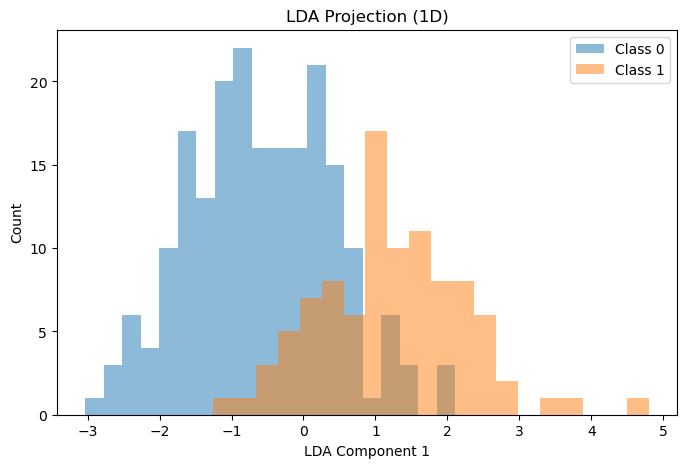

In [13]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(8, 5))
for label in np.unique(y):
    plt.hist(X_lda[y == label], label=f"Class {label}", alpha=0.5, bins=20)

plt.title("LDA Projection (1D)")
plt.xlabel("LDA Component 1")
plt.ylabel("Count")
plt.legend()
plt.show()

Not too much overlap, showing LDA could be a useful model for classification on this data. 

Lets remove some of our non-normal/non-equal covariances features, excluding time and age as they inherently influence the impact of heart disease.

In [38]:
X_dropped = X.drop(['creatinine_phosphokinase', 'serum_creatinine',  'serum_sodium', 'serum_creatinine'], axis =1)

We removed the creatinine columns due to non-normality due to strong possible outliers for those who have kidney disease.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size = 0.3, random_state = 42)

In [40]:
# Fit again with removed columns
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("LDA accuracy is", accuracy)
print(model.coef_)

LDA accuracy is 0.8222222222222222
[[ 5.90222268e-02 -4.26434149e-01  5.74381118e-02 -7.09416189e-02
  -4.75439433e-01 -1.98453211e-06 -9.00640390e-01  1.94751769e-01
  -2.30197381e-02]]


Same accuracy, but we have a better validated model.

Let's also check for multicollinearity between predictors.

                           age  anaemia  creatinine_phosphokinase  diabetes  \
age                       1.00     0.09                     -0.08     -0.10   
anaemia                   0.09     1.00                     -0.19     -0.01   
creatinine_phosphokinase -0.08    -0.19                      1.00     -0.01   
diabetes                 -0.10    -0.01                     -0.01      1.00   
ejection_fraction         0.06     0.03                     -0.04     -0.00   
high_blood_pressure       0.09     0.04                     -0.07     -0.01   
platelets                -0.05    -0.04                      0.02      0.09   
serum_creatinine          0.16     0.05                     -0.02     -0.05   
serum_sodium             -0.05     0.04                      0.06     -0.09   
sex                       0.07    -0.09                      0.08     -0.16   
smoking                   0.02    -0.11                      0.00     -0.15   
time                     -0.22    -0.14             

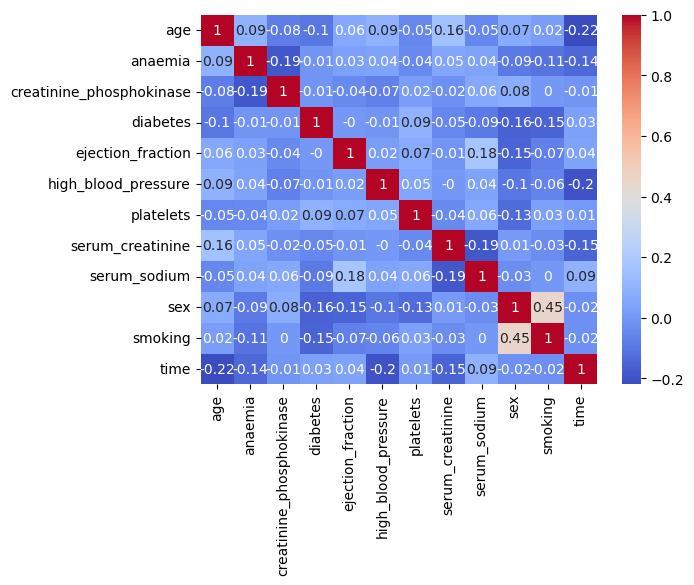

In [49]:
import pandas as pd

def calculate_correlation_matrix(df):
    """
    Calculates the correlation matrix for a Pandas DataFrame.

    Returns:
        pd.DataFrame: The correlation matrix.
    """

    # Ensure all columns are numeric
    numeric_df = df.apply(pd.to_numeric, errors='coerce')

    # Remove any columns that could not be converted to numeric
    numeric_df = numeric_df.dropna(axis=1)

    if numeric_df.empty:
        raise ValueError("DataFrame contains no numeric columns for correlation analysis.")

    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()
    return correlation_matrix

# Calculate the correlation matrix
correlation_matrix = correlation_matrix.round(2)

print(correlation_matrix)


import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Multicollinearity assumption seems to be met with only features sex and smoking having a higher collinearity. 

We do have quite a few predictors though so lets try Lasso with L1 regularization.

In [51]:
from sklearn.linear_model import Lasso
# Fit the Lasso model
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)

# Get feature coefficients
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,       
    'Coefficient': lasso.coef_       
})

print(coefficients_df)

               Feature   Coefficient
0                  age  0.000000e+00
1              anaemia -0.000000e+00
2             diabetes  0.000000e+00
3    ejection_fraction -1.147439e-03
4  high_blood_pressure -0.000000e+00
5            platelets -1.580802e-07
6                  sex -0.000000e+00
7              smoking -0.000000e+00
8                 time -2.912414e-03


Lasso sends age, sex, and smoking to 0 so we will omit these features from our model. This fixes the multicollinearity issue between sex and smoking and the issue with age not being satisfying the normality assumption. Lasso sent these variables to 0 before the others indicating that they are not very important to our model, so we will remove them.

In [52]:
X_lasso = X_dropped.drop(['age', 'sex',  'smoking'], axis =1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size = 0.3, random_state = 42)

In [55]:
# Fit again with removed columns
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("LDA accuracy is", accuracy)
print(model.coef_)

LDA accuracy is 0.8111111111111111
[[-2.21238592e-01  7.66800461e-02 -6.24531428e-02 -3.82134952e-01
  -8.43014411e-07 -2.30791301e-02]]


Accuracy went down by 0.1% but we now have a validated model with our selected features. Lets try to increase the training size for better accuracy.

In [64]:
X_lasso

,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,time
0,0,0,20,1,265000.00,4
1,0,0,38,0,263358.03,6
2,0,0,20,0,162000.00,7
3,1,0,20,0,210000.00,7
4,1,1,20,0,327000.00,8
...,...,...,...,...,...,...
294,0,1,38,1,155000.00,270
295,0,0,38,0,270000.00,271
296,0,1,60,0,742000.00,278
297,0,0,38,0,140000.00,280


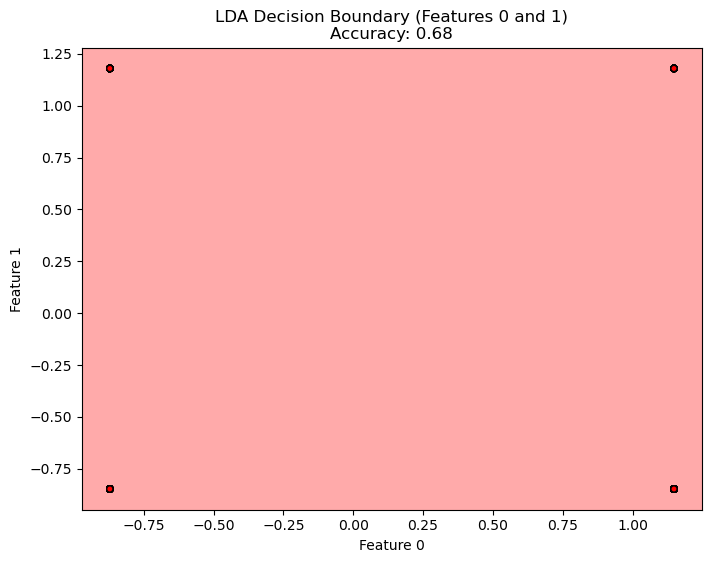

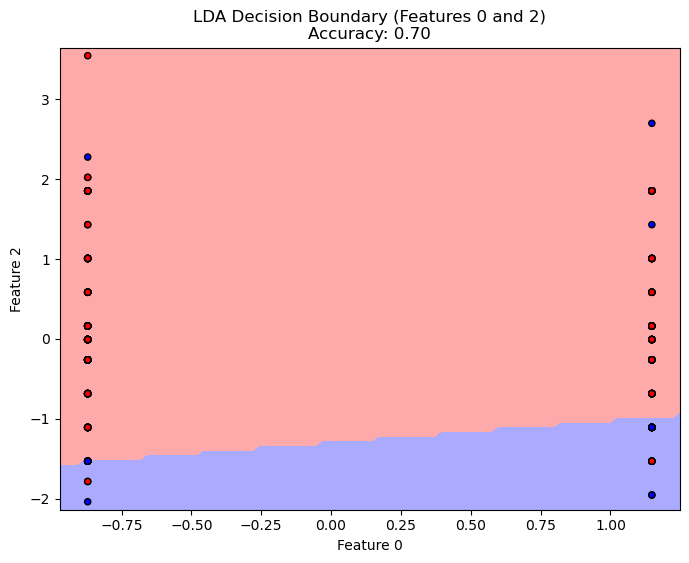

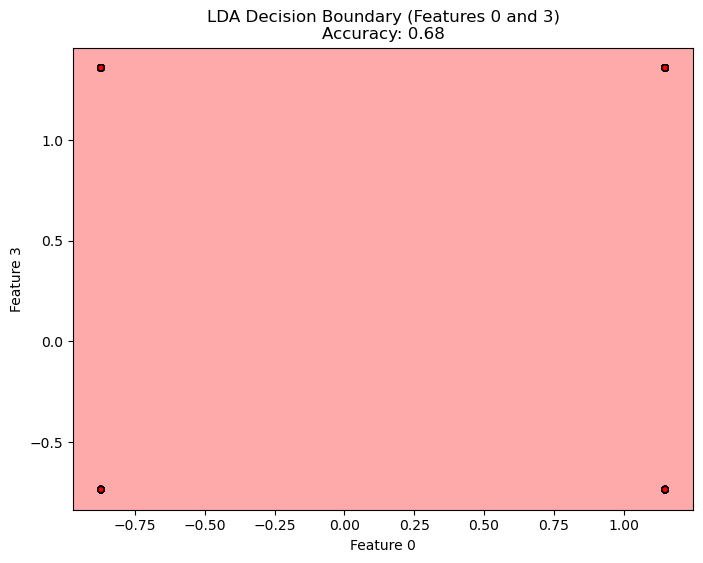

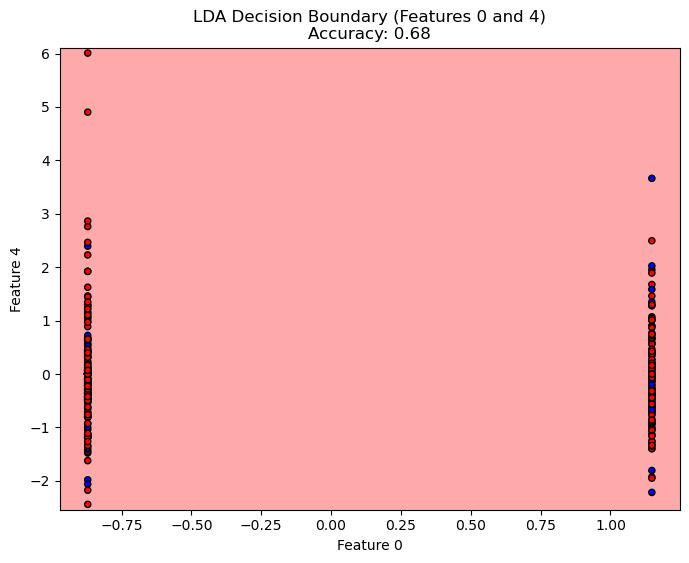

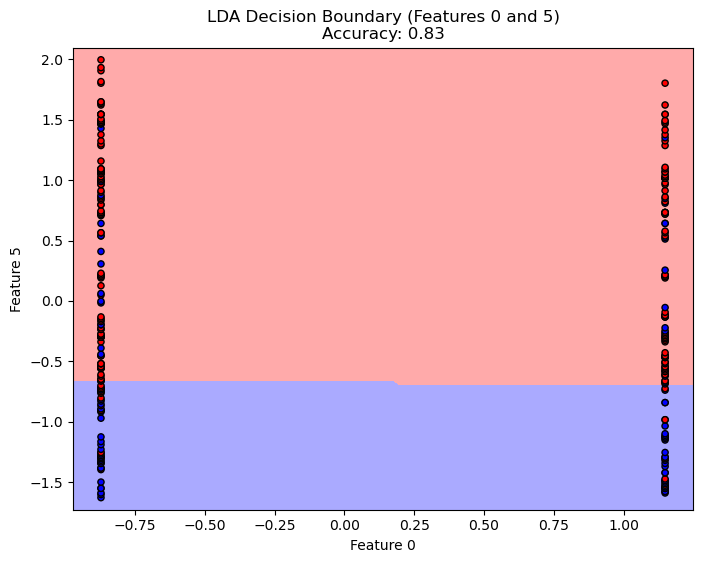

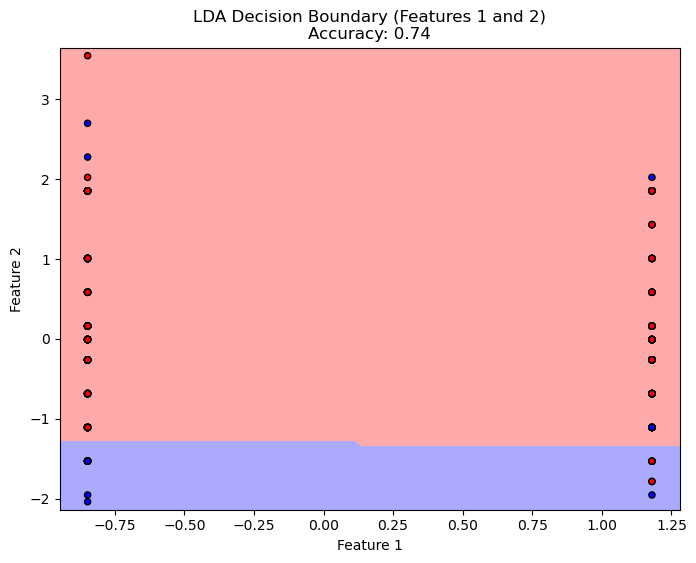

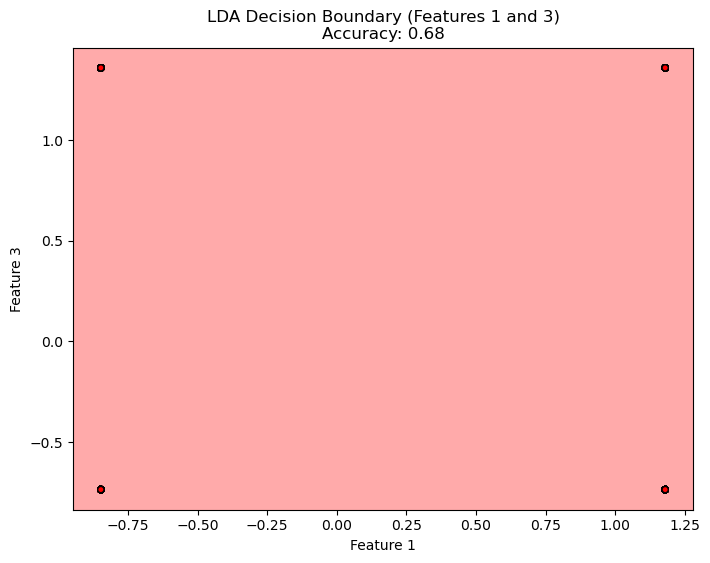

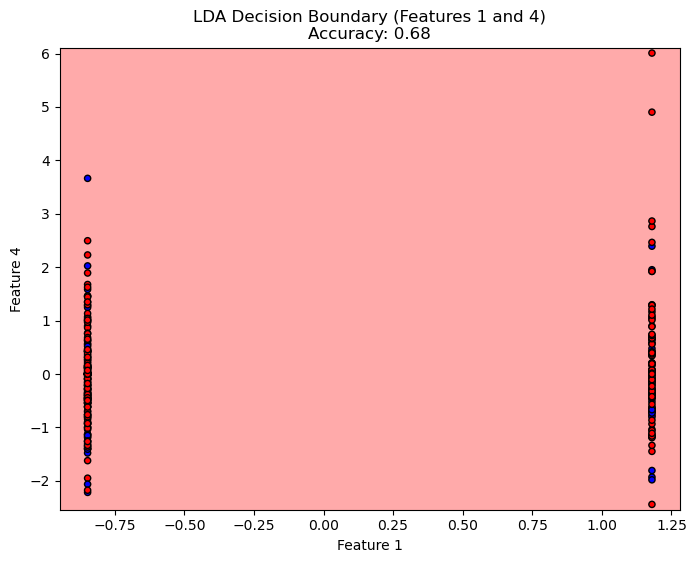

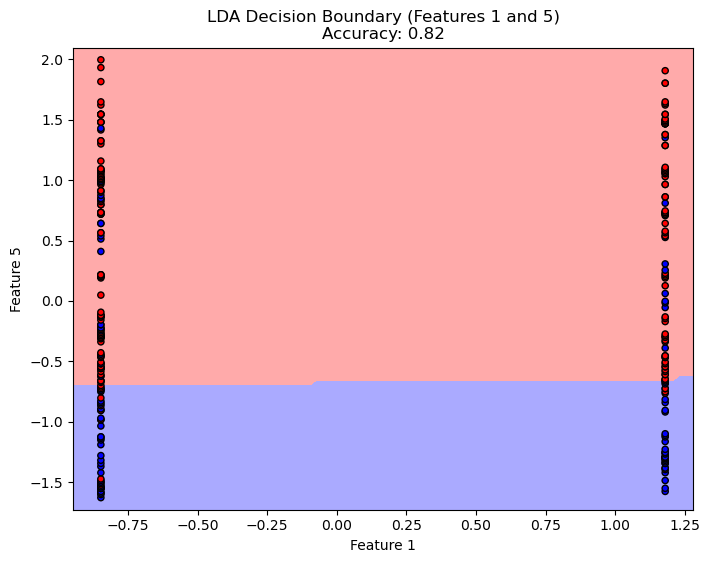

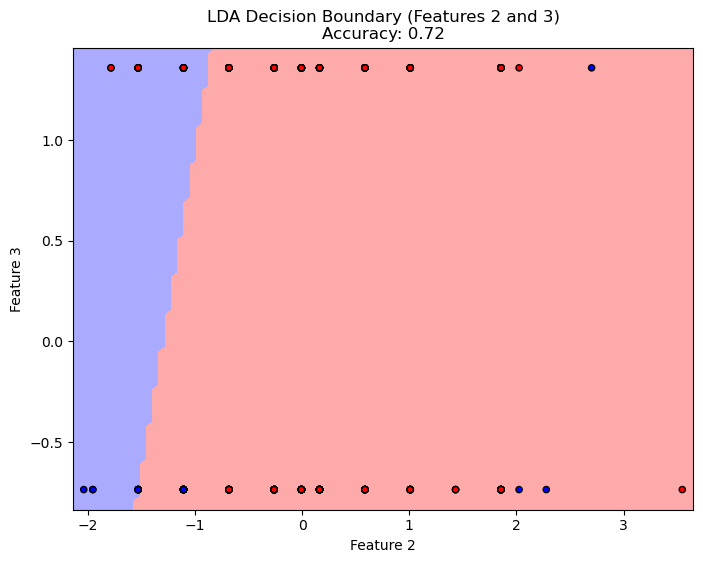

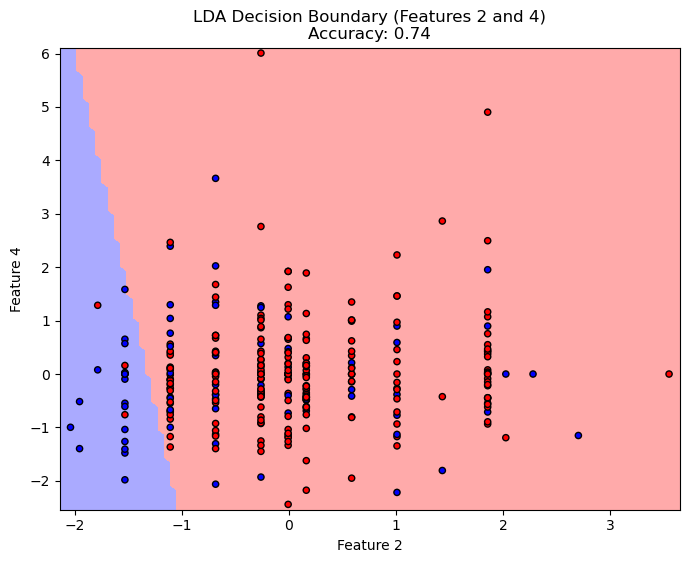

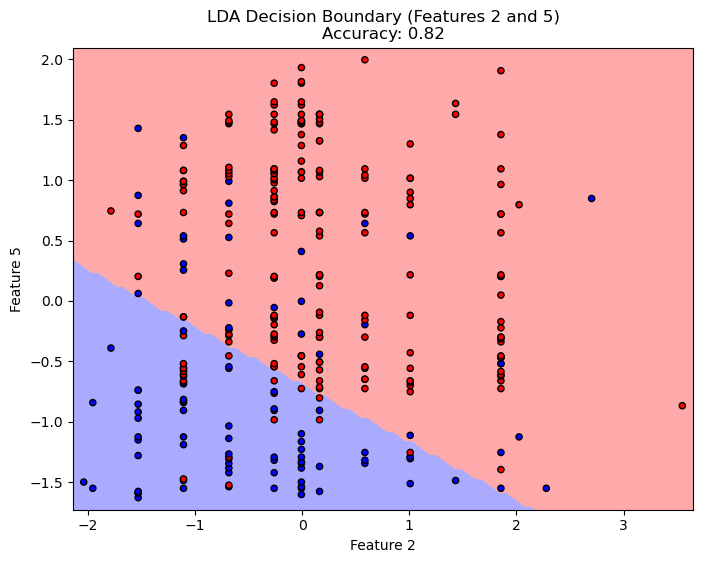

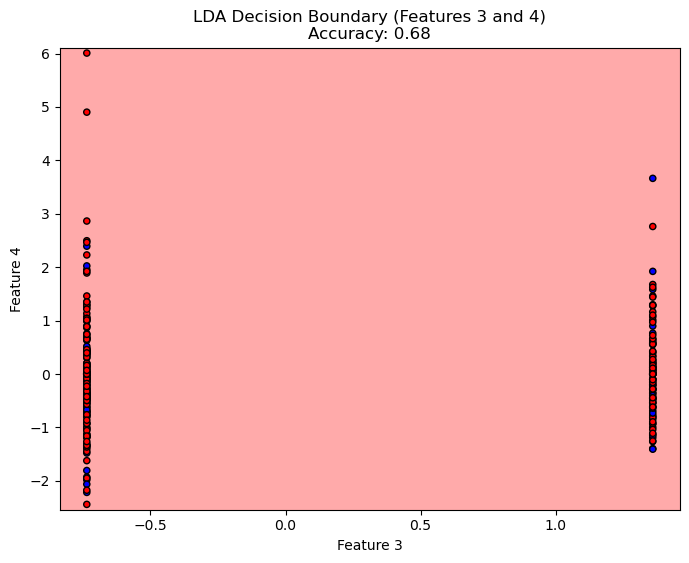

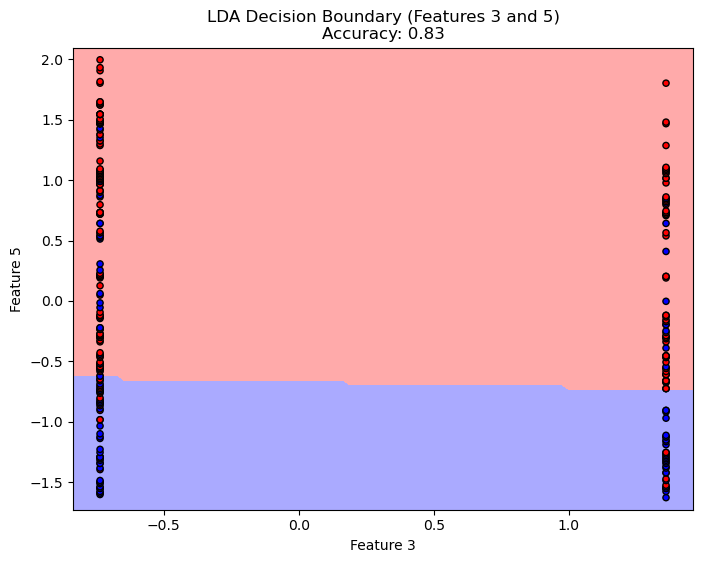

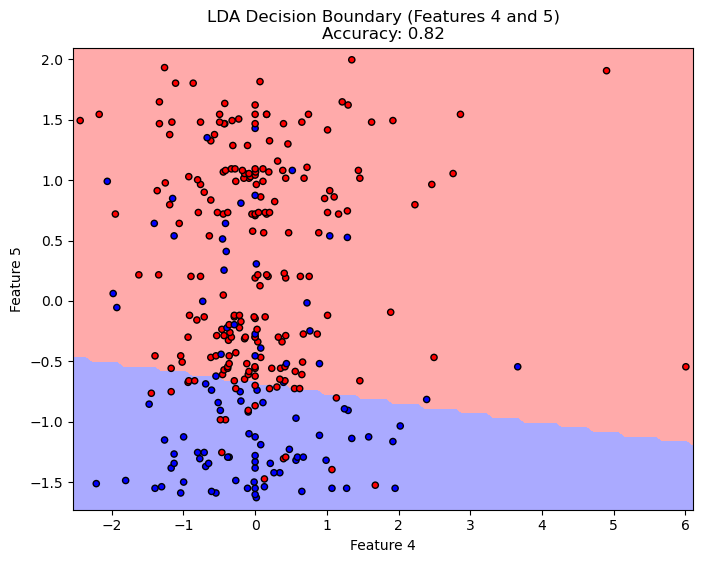

In [69]:
from itertools import combinations
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

def plot_decision_boundaries(X_lasso, y, model, title, accuracy):
    plt.figure(figsize=(10, 8))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(f"{title}\nAccuracy: {accuracy:.2f}")
    plt.xlabel(f'Feature {feature_pair[0]}')
    plt.ylabel(f'Feature {feature_pair[1]}')


feature_pairs = list(combinations(range(X_lasso.shape[1]), 2))

for feature_pair in feature_pairs:
    # Extract the data for the features
    X_pair = X_lasso.iloc[:, list(feature_pair)]

    # Scale the data
    scaler = StandardScaler()
    X_pair_scaled = scaler.fit_transform(X_pair)

    # Fit the model to this pair of features
    lda_pair = LinearDiscriminantAnalysis()
    lda_pair.fit(X_pair_scaled, y)

    # Calculate accuracy
    y_pred = lda_pair.predict(X_pair_scaled)
    accuracy = accuracy_score(y, y_pred)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    # Define color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Set plot size

    # Ensure X_lasso is a NumPy array
    X = np.array(X_pair_scaled)

    # Determine plot bounds
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Make predictions on the grid
    Z = lda_pair.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Add plot labels and title
    plt.xlabel(f'Feature {feature_pair[0]}')
    plt.ylabel(f'Feature {feature_pair[1]}')
    title = f"LDA Decision Boundary (Features {feature_pair[0]} and {feature_pair[1]})\nAccuracy: {accuracy:.2f}"
    plt.title(title)
    plt.show()

The features 2, 3, and 5 seem to have the most linearly separable decision boundaries lets try the model with just those features.

In [88]:
X_small = X_lasso.iloc[:, [2,3,5]]

In [89]:
X_small

,ejection_fraction,high_blood_pressure,time
0,20,1,4
1,38,0,6
2,20,0,7
3,20,0,7
4,20,0,8
...,...,...,...
294,38,1,270
295,38,0,271
296,60,0,278
297,38,0,280


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size = 0.3, random_state = 42)

In [91]:
# Fit again with removed columns
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("LDA accuracy is", accuracy)
print(model.coef_)

LDA accuracy is 0.8333333333333334
[[-0.0630599  -0.39437696 -0.02280754]]


Our accuracy has slightly increased. 

## Conclusion & Interpretation of Linearity in Heart Disease Prediction

Our results indicate that Linear Discriminant Analysis (LDA) outperformed other models, yielding a slight increase in accuracy compared to alternative classification techniques. This suggests that the relationship between our key predictors and the presence of heart disease follows a linear trend, making LDA the most suitable model for this dataset.

To ensure the reliability of our findings, we validated the key assumptions of LDA, including the normality of predictor distributions within each class and the homogeneity of covariance matrices. Variables that did not meet these assumptions were removed to optimize model performance. Additionally, we applied LASSO regression for feature selection, which helped refine our model by eliminating less important predictors, resulting in a simpler yet effective model. The final predictors—ejection_fraction, high_blood_pressure, and time—demonstrated a strong linear relationship with heart disease outcomes, reinforcing the suitability of LDA.

In contrast, Random Forest and Gradient Boosting models yielded lower accuracy, further supporting the hypothesis that the relationship between our predictors and heart disease is primarily linear. The underperformance of these non-linear models suggests that introducing complex decision boundaries does not necessarily improve classification accuracy in this dataset.

From a clinical perspective, these findings suggest that traditional cardiovascular risk assessment methods, which often rely on linear scoring (e.g., Framingham Risk Score), remain effective. Furthermore, the interpretability of LDA allows for clear decision boundaries and transparent insights into how individual risk factors contribute to heart disease prediction.

While our dataset supports a linear relationship, real-world clinical data may involve non-linear interactions that were not fully captured. Future research could explore incorporating time-series patient data, continuous monitoring, and hybrid modeling approaches to enhance predictive accuracy.

In conclusion, LDA proved to be the best model for heart disease prediction, with its assumptions validated and its performance exceeding that of non-linear models. Additionally, LASSO regression improved model simplicity and interpretability, reinforcing the linear nature of key risk factors. While this approach was effective for our dataset, further research is needed to assess its generalizability across broader, more complex patient populations.